# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct statistical tests on a real-world dataset

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
!ls

CONTRIBUTING.md  index.ipynb  multipleChoiceResponses_cleaned.csv  README.md
index_files	 LICENSE.md   multipleChoiceResponses.csv	   schema.csv


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding='latin1')

/opt/conda/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, resul

In [4]:
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [6]:
df.dtypes

GenderSelect                                object
Country                                     object
Age                                         object
EmploymentStatus                            object
StudentStatus                               object
LearningDataScience                         object
CodeWriter                                  object
CareerSwitcher                              object
CurrentJobTitleSelect                       object
TitleFit                                    object
CurrentEmployerType                         object
MLToolNextYearSelect                        object
MLMethodNextYearSelect                      object
LanguageRecommendationSelect                object
PublicDatasetsSelect                        object
LearningPlatformSelect                      object
LearningPlatformUsefulnessArxiv             object
LearningPlatformUsefulnessBlogs             object
LearningPlatformUsefulnessCollege           object
LearningPlatformUsefulnessCompa

In [7]:
!ls

CONTRIBUTING.md  index.ipynb  multipleChoiceResponses_cleaned.csv  README.md
index_files	 LICENSE.md   multipleChoiceResponses.csv	   schema.csv


In [8]:
schema_df = pd.read_csv('schema.csv')

In [9]:
schema_df

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All
5,StudentStatus,Are you currently enrolled as a student at a d...,Non-worker
6,LearningDataScience,Are you currently focused on learning data sci...,Non-worker
7,KaggleMotivationFreeForm,What's your motivation for being a Kaggle user?,Non-switcher
8,CodeWriter,Do you write code to analyze data in your curr...,Worker1
9,CareerSwitcher,Are you actively looking to switch careers to ...,Worker1


In [10]:
[x for x in df.columns if 'cation' in x]

['FormalEducation', 'ParentsEducation']

In [11]:
df['FormalEducation'].unique()

array(["Bachelor's degree", "Master's degree", 'Doctoral degree', nan,
       "Some college/university study without earning a bachelor's degree",
       'I did not complete any formal education past high school',
       'Professional degree', 'I prefer not to answer'], dtype=object)

In [12]:
bs_df = df[df['FormalEducation'] == "Bachelor's degree"]

In [13]:
ms_df = df[df['FormalEducation'] == "Master's degree"]

In [14]:
bs_df.dropna(subset=["AdjustedCompensation"], inplace=True)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
ms_df.dropna(subset=["AdjustedCompensation"], inplace=True)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
len(bs_df), len(ms_df)

(1107, 1990)

In [22]:
len(bs_df[bs_df["AdjustedCompensation"] == 0])/len(bs_df)

0.007226738934056007

In [23]:
len(ms_df[ms_df["AdjustedCompensation"] == 0])/len(ms_df)

0.010552763819095477

In [24]:
bs_df = bs_df[bs_df["AdjustedCompensation"] != 0]

In [25]:
ms_df = ms_df[ms_df["AdjustedCompensation"] != 0]

In [26]:
len(bs_df), len(ms_df)

(1099, 1969)

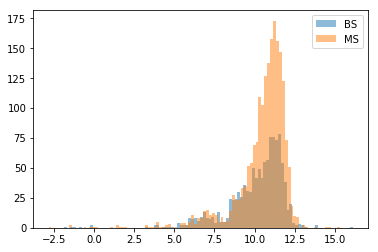

In [28]:
plt.hist(np.log(bs_df["AdjustedCompensation"]), bins=100, alpha=0.5, label='BS')
plt.hist(np.log(ms_df["AdjustedCompensation"]), bins=100, alpha=0.5, label='MS')
plt.legend()

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import statsmodels

In [30]:
from scipy import stats

In [31]:
print(stats.shapiro(np.log(bs_df["AdjustedCompensation"])))
print(stats.shapiro(np.log(ms_df["AdjustedCompensation"])))

(0.8487945199012756, 3.965672192216566e-31)
(0.7717934846878052, 0.0)


In [32]:
stats.ttest_ind(np.log(bs_df["AdjustedCompensation"]), np.log(ms_df["AdjustedCompensation"]), equal_var = False)

Ttest_indResult(statistic=-5.433034113657676, pvalue=6.176639286198528e-08)

In [33]:
print(np.mean(np.log(bs_df["AdjustedCompensation"])))
print(np.mean(np.log(ms_df["AdjustedCompensation"])))

10.106547343883838
10.465851066410725


Looks like MS participants make more than BS participants

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [14]:
phd_df.dropna(subset=["AdjustedCompensation"], inplace=True)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
len(bs_df), len(ms_df)

(1107, 1990)

In [22]:
len(bs_df[bs_df["AdjustedCompensation"] == 0])/len(bs_df)

0.007226738934056007

In [24]:
bs_df = bs_df[bs_df["AdjustedCompensation"] != 0]

In [26]:
len(bs_df), len(ms_df)

(1099, 1969)

In [11]:
#Your code here

Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [ ]:
#Your code here

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!